In [1]:
from pathlib import Path as p
import matplotlib.pyplot as plt
import numpy as np
import glob as g
import os

In [2]:
work_dir = p('/media/Data/GoogleDriveNtust/dissertation_01/workFinal/workDir')

In [3]:
registrationResults = p(f'{work_dir}/registration_results/processingTime')
os.chdir(registrationResults)
csvNames = g.glob('*_time.csv')

subjects = os.listdir(p(f'{work_dir}/test_dataset/derivatives/pipeline_0'))

title = ['Registration Method']
title.extend(subjects)
title.append('Mean')
title.append('Standard Deviation')

csfont = {'fontname':'Times New Roman'}

In [4]:
csvNames

['ANTSQuick_time.csv',
 'ANTS_time.csv',
 'broccoli_time.csv',
 'Elastix_time.csv',
 'FSL2mmThreaded_time.csv',
 'SPMpy_time.csv']

In [5]:
regPrograms = ['ANTS Quick', 'ANTS', 'BROCCOLI', 'Elastix', 'FSL', 'SPM']

In [6]:
meanTimes = []
stdTimes = []
reg_programs = []

for csvName in csvNames:
    qarray = []
    data = np.genfromtxt(csvName, delimiter = ',')
    if 'SPMpy' in csvName:
        reg_programs.append(csvName[:-9])
        qarray.append(csvName[:-9])
        qarray.extend(data[1,1:])
        meanTime = np.mean(data[1,1:])
        meanTimes.append(meanTime)
        qarray.append(meanTime)
        stdTime = np.std(data[1,1:])
        stdTimes.append(stdTime)
        qarray.append(stdTime)     
    elif 'SPM' in csvName:
        reg_programs.append(csvName[:-9])
        qarray.append(csvName[:-9])
        qarray.extend(data)
        meanTime = np.mean(data)
        qarray.append(meanTime)
        meanTimes.append(meanTime)
        stdTime = np.std(data)
        stdTimes.append(stdTime)
        qarray.append(stdTime)
    else:
        reg_programs.append(csvName[:-9])
        qarray.append(csvName[:-9])
        qarray.extend(data[1,1:])
        meanTime = np.mean(data[1,1:])
        meanTimes.append(meanTime)
        qarray.append(meanTime)
        stdTime = np.std(data[1,1:])
        stdTimes.append(stdTime)
        qarray.append(stdTime)
    title = np.vstack((title, qarray))
np.savetxt(p(f'{registrationResults}/registrationTime.csv'), title, fmt='%s', delimiter = ',')

In [7]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.around(height, decimals=2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height), 
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', 
                    fontname='Times New Roman', fontsize=22)

In [8]:
meanTimes

[79.1280151939392,
 963.9421813154221,
 5.082258219718933,
 35.86085216999054,
 508.94023433208463,
 129.61986351013184]

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


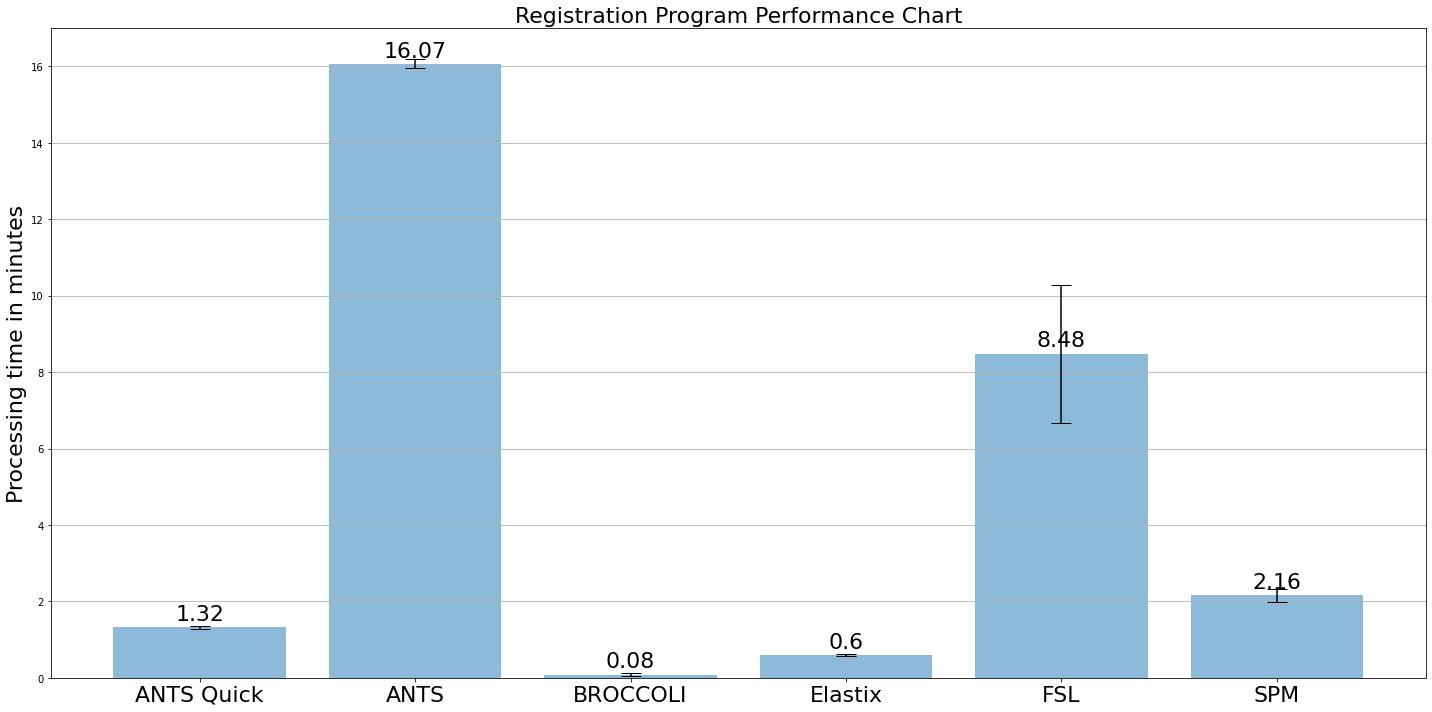

In [9]:
x_pos = np.arange(len(reg_programs))


ig, ax = plt.subplots(figsize=(20, 10))
rects = ax.bar(x_pos, np.array(meanTimes) / 60, yerr=np.array(stdTimes) / 60, align='center', alpha=0.5, ecolor='black', capsize=10)
autolabel(rects)
ax.set_ylabel('Processing time in minutes', fontname='Times New Roman', fontsize=22)
ax.set_xticks(x_pos)
ax.set_xticklabels(regPrograms, fontname='Times New Roman', fontsize=22)
ax.set_title('Registration Program Performance Chart', csfont, fontsize=22)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig(p(f'{registrationResults}/registrationTime.jpg'))
plt.show()